In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

In [4]:
columns = [ 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
for column in columns:
    Q1 = boston[column].quantile(0.25)
    Q3 = boston[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
     # Clip values outside the bounds
    boston[column] = boston[column].clip(lower=lower_bound, upper=upper_bound)

In [5]:
X = boston.drop(columns='medv') # Features
y = boston['medv'] # Target Variable

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

mean squared error:23.362445664289925
R^2 score:0.6814231496387586


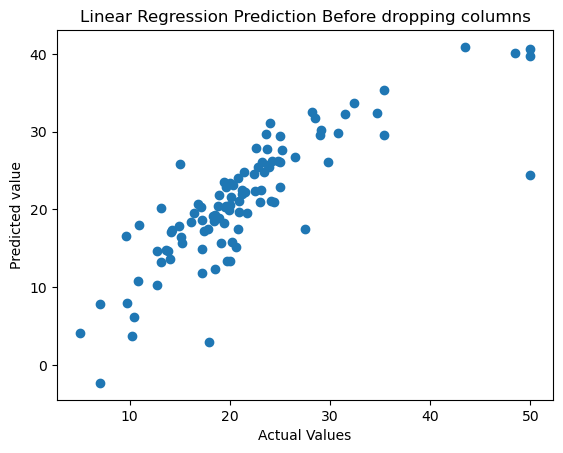

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mean squared error:{mse}")
print(f"R^2 score:{r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted value")
plt.title("Linear Regression Prediction Before dropping columns")
plt.show()

In [10]:
## there may not be any effect of black people living in city to price and low status people living
boston.drop(['b', 'lstat'], axis='columns', inplace=True)

In [11]:
X = boston.drop(columns='medv') # Features
y = boston['medv'] # Target Variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

mean squared error:26.662254231517462
R^2 score:0.6364260360981485


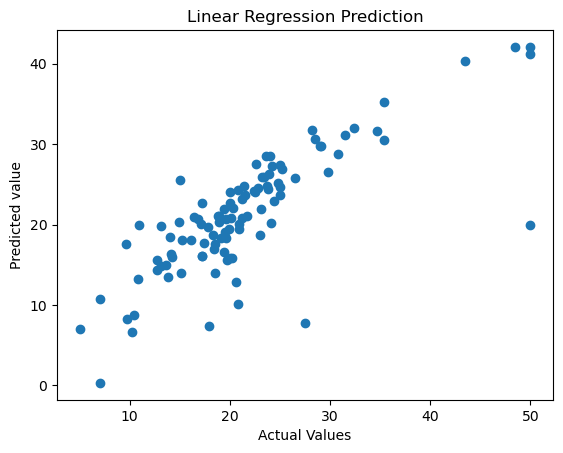

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mean squared error:{mse}")
print(f"R^2 score:{r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted value")
plt.title("Linear Regression Prediction")
plt.show()